BloomTech Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

## Assignment

Complete these tasks for your assignment/project, and document your decisions.

- Choose your target. Which column in your tabular dataset will you predict?
- Is your problem regression or classification?
- How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- Begin to clean and explore your data.
- Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. Review requirements for your portfolio project on Canvas, and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

## Business Scenario

Lending Club is an American lending marketplace that connects investors with borrowers. Instead of a bank or financial institution, investors act as lenders to fund borrowers loans.

Investors want to lend money to people who show a profile
of having a high probability of repayment. However, they face the challenge of predicting the risk of a borrower being unable to pay the loan back in full. They feel that the insights from existing data will help them in making data-driven decisions. So as data scientists, we will be building a model that can help in predicting whether a loan will not be paid back.

The dataset contains more than 9,500 loans with information about the borrower profile, loan structure and whether the loan was repaid. This data was extracted from [Kaggle - Loan Data](https://www.kaggle.com/datasets/itssuru/loan-data).

### Data dictionary

|    | Variable          | Explanation                                                                                                             |
|---:|:------------------|:------------------------------------------------------------------------------------------------------------------------|
|  0 | credit_policy     | 1 if the customer meets the credit underwriting criteria; 0 otherwise.                                                  |
|  1 | purpose           | The purpose of the loan.                                                                                                |
|  2 | int_rate          | The interest rate of the loan (more risky borrowers are assigned higher interest rates).                                |
|  3 | installment       | The monthly installments owed by the borrower if the loan is funded.                                                    |
|  4 | log_annual_inc    | The natural log of the self-reported annual income of the borrower.                                                     |
|  5 | dti               | The debt-to-income ratio of the borrower (amount of debt divided by annual income).                                     |
|  6 | fico              | The FICO credit score of the borrower.                                                                                  |
|  7 | days_with_cr_line | The number of days the borrower has had a credit line.                                                                  |
|  8 | revol_bal         | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).                           |
|  9 | revol_util        | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| 10 | inq_last_6mths    | The borrower's number of inquiries by creditors in the last 6 months.                                                   |
| 11 | delinq_2yrs       | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                           |
| 12 | pub_rec           | The borrower's number of derogatory public records.                                                                     |
| 13 | not_fully_paid    | 1 if the loan is not fully paid; 0 otherwise.   

In [ ]:
# Import Libraries, Dataset

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Path to dataset
DATA_PATH = '/content/loan_data.csv'

### **Read Data**

In [ ]:
def wrangle(filepath):
    loans = pd.read_csv(filepath)

    # Replacing period in column names with underscore
    loans.columns = loans.columns.str.replace(".", "_")

    # Set data type of 'purpose' column as category
    loans['purpose'] = loans['purpose'].astype('category')

    return loans

In [ ]:
loans = wrangle(DATA_PATH)

# Check shape of data set and first 5 rows
display(loans.head())
print(loans.shape)

<ipython-input-4-e2f2649f9dd0>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loans.columns = loans.columns.str.replace(".", "_")


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


(9578, 14)


### **Exploratory Data Analysis**

In [ ]:
# Check data types, column names and non-null values
print('Total null values:', loans.isnull().sum().sum())
loans.info()

Total null values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   credit_policy      9578 non-null   int64   
 1   purpose            9578 non-null   category
 2   int_rate           9578 non-null   float64 
 3   installment        9578 non-null   float64 
 4   log_annual_inc     9578 non-null   float64 
 5   dti                9578 non-null   float64 
 6   fico               9578 non-null   int64   
 7   days_with_cr_line  9578 non-null   float64 
 8   revol_bal          9578 non-null   int64   
 9   revol_util         9578 non-null   float64 
 10  inq_last_6mths     9578 non-null   int64   
 11  delinq_2yrs        9578 non-null   int64   
 12  pub_rec            9578 non-null   int64   
 13  not_fully_paid     9578 non-null   int64   
dtypes: category(1), float64(6), int64(7)
memory usage: 982.6 KB


In [ ]:
# Get summary statistics for numerical variables
loans.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
# Summary statistics for categorical variables
loans.describe(include='category')

,purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


In [ ]:
# Unique values in column 'purpose'
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [ ]:
# Check for duplicated records in the DataFrame
loans.duplicated().sum()

0

<ipython-input-12-373aebfe55e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loans.corr(), annot=True,


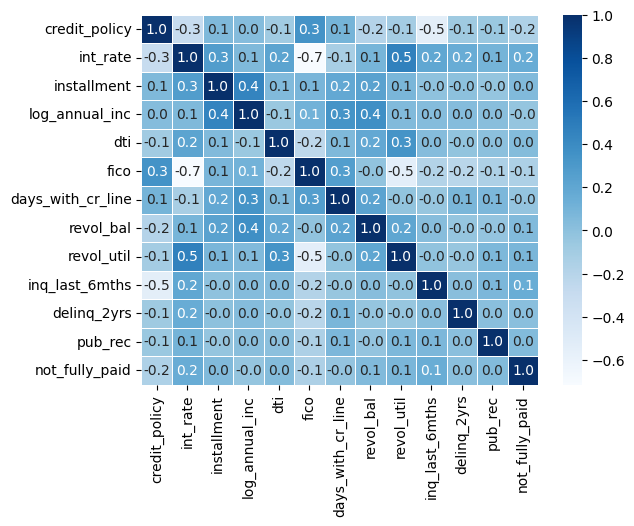

In [ ]:
# Generate correlation matrix to understand the relationship between the different features
sns.heatmap(loans.corr(), annot=True,
            fmt=".1f", linewidth = 0.5, cmap = 'Blues');

In the correlation matrix, we can see a negative relationship between 'fico' and 'interest_rate'. This means that the lower the fico scores, the higher the interest rate that Lendig Club assigns to the borrowers.

Also, we see that 'log_annual_inc' is slightly positively correlated with 'installment'. The bigger the income, the bigger the installments to repay the loan.

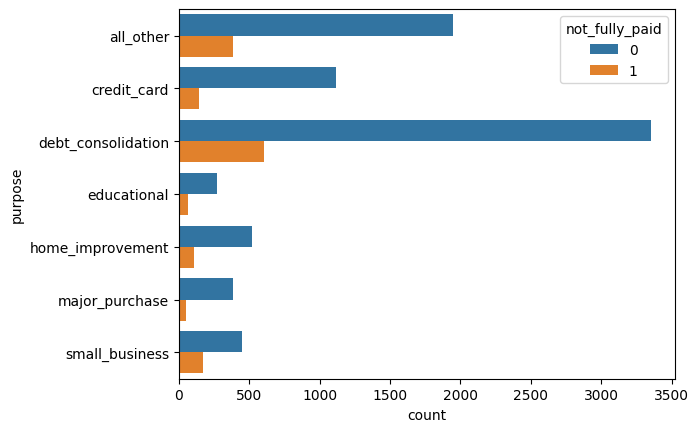

In [ ]:
# Explore 'not.fully.paid' loan and the 'purpose' of the loan
sns.countplot(data=loans, y='purpose', hue='not_fully_paid');

Looking at the graph above we can conclude that most of the loans were taken with the purpose of debt consolidation. Many of the loans were completely paid back (0) and a few of them were not fully paid (1). Notice here that we encountered what is known as class imbalance: there are fewer examples of loans not fully paid.

### **Target Feature**

The column to predict from the tabular dataset is 'not_fully_paid', which represents whether a loan is not fully paid (1) or fully paid (0).



### **Type of Task**

Based on the target feature 'not_fully_paid' having binary classes (0 and 1), the problem is a classification task.

### **Finding Outliers**

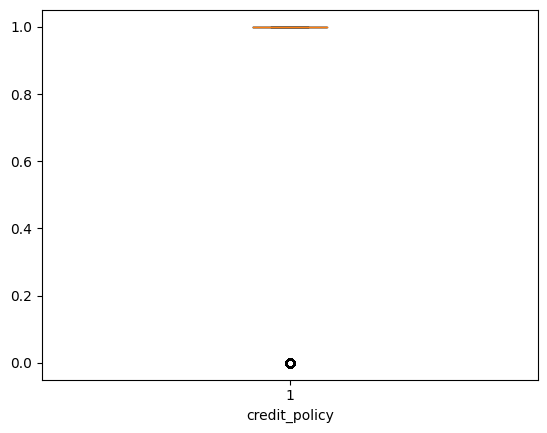

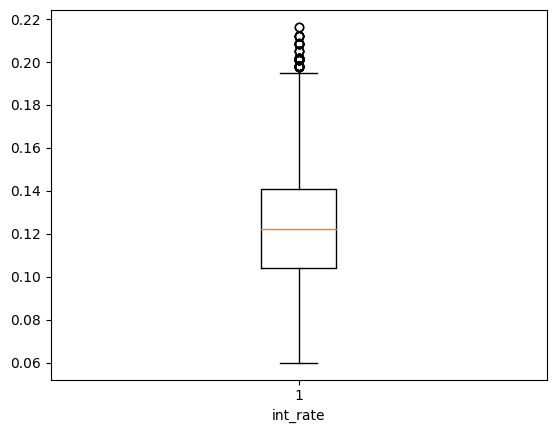

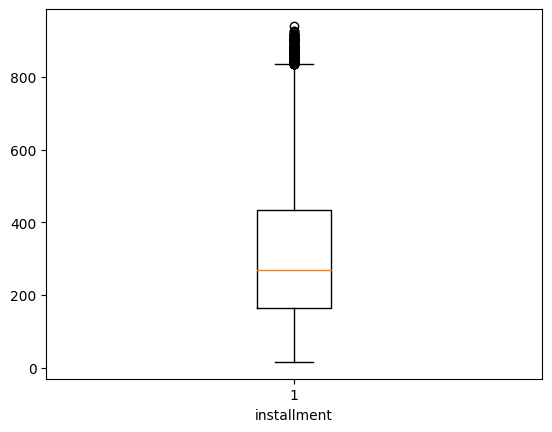

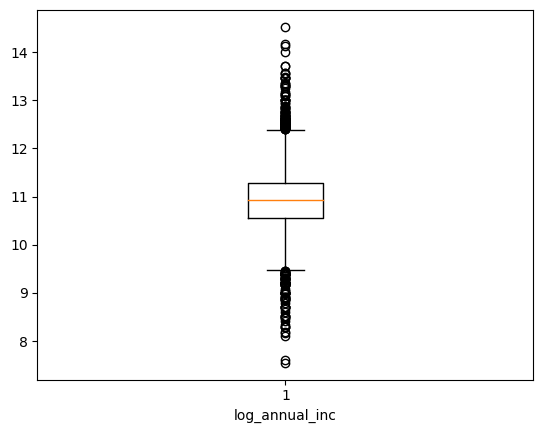

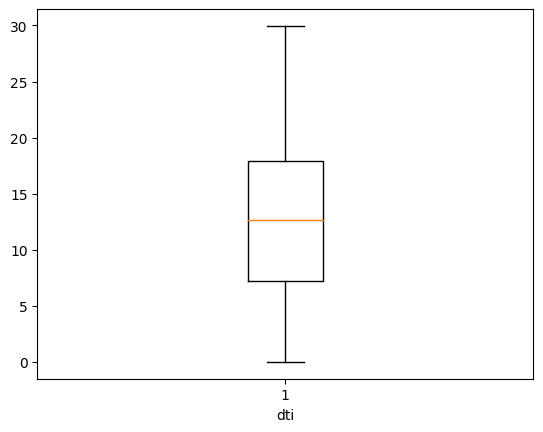

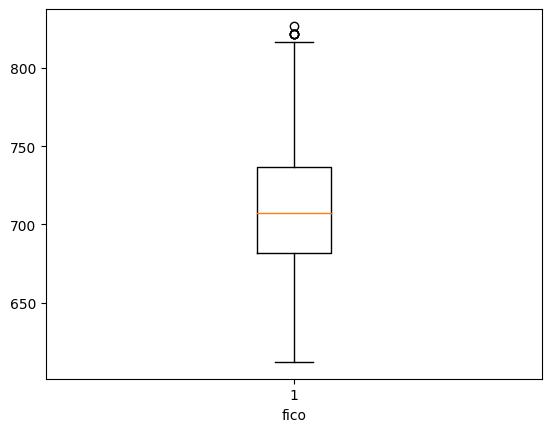

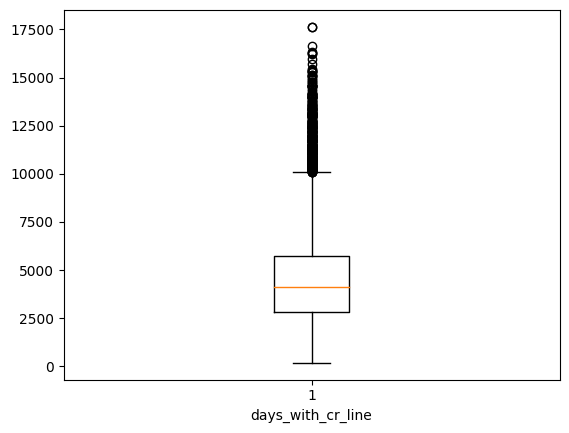

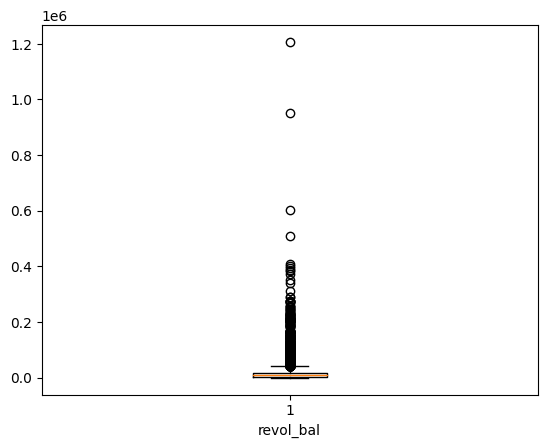

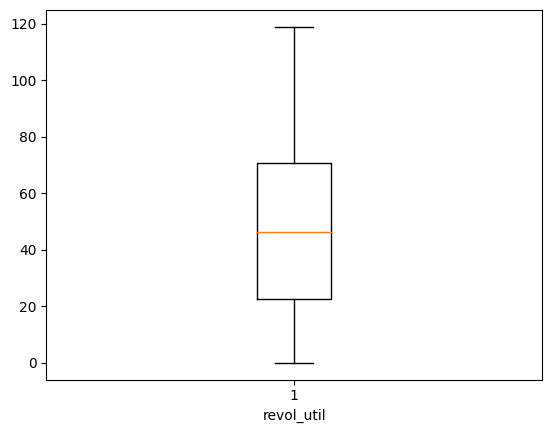

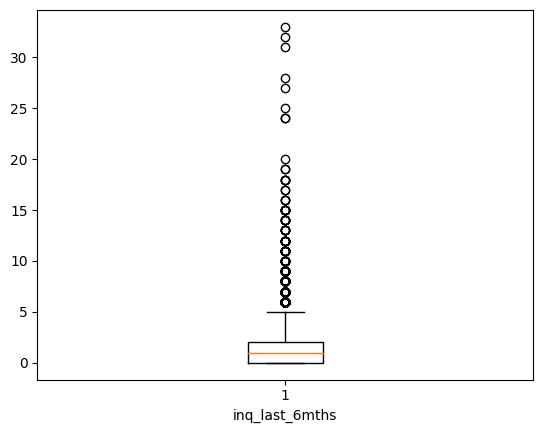

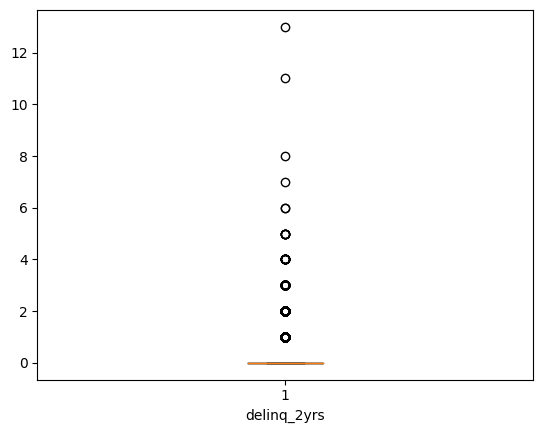

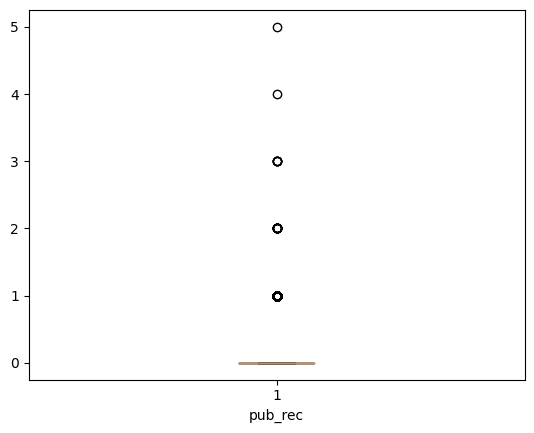

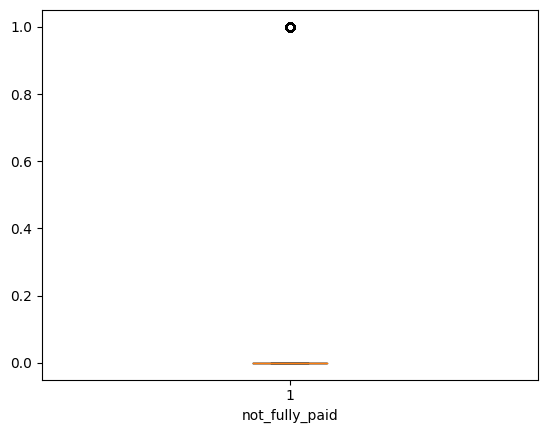

In [ ]:
# Box Plots for numerical features

numeric_columns = loans.select_dtypes(include=['float', 'int']).columns
for col in numeric_columns:
    plt.figure()
    plt.xlabel(col)
    plt.boxplot(loans[col])

The 'log_annual_inc' column has outliers on both the lower and upper fences. It might be due to having borrowers of both very low and very high incomes applying for loans. We also have a few outliers on the upper fence of 'fico', 'int_rate' and 'installment' features.

We understand that removing or replacing outliers requires a lot of care and domain knowledge. In this occasion, we will adjust the 'log_annual_inc' outliers for modeling by replacing them with their upper and lower limits. The outliers in 'fico', 'int_rate', and 'installment' represent valid instances and contribute valuable information to the analysis, so we are going to leave them as they are.

In [ ]:
# Finding the upper and lower limit for some of the features

def find_outlier_limits(col_name):
    Q1,Q3=loans[col_name].quantile([.25,.75])
    IQR=Q3-Q1
    low=Q1-(1.5* IQR)
    high=Q3+(1.5* IQR)
    return (high,low)

high_log_annual_inc, low_log_annual_inc = find_outlier_limits('log_annual_inc')
print('Log Annual Income: ','upper limit: ',high_log_annual_inc,' lower limit: ',low_log_annual_inc)

Log Annual Income:  upper limit:  12.39061201375  lower limit:  9.45909442375


In [ ]:
# Replacing outlier values for log_annual_inc, and installment with respective upper and lower limits
loans.loc[loans['log_annual_inc'] > high_log_annual_inc,'log_annual_inc'] = high_log_annual_inc
loans.loc[loans['log_annual_inc'] < low_log_annual_inc,'log_annual_inc'] = low_log_annual_inc

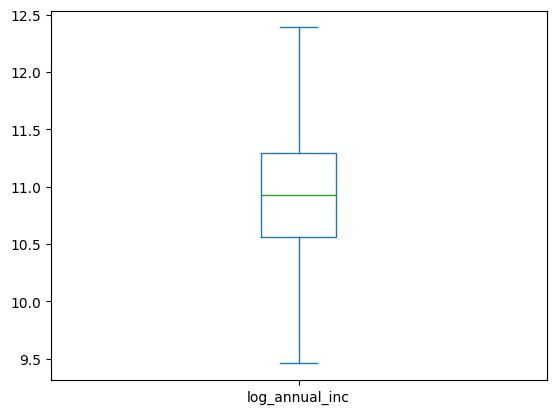

In [ ]:
# Check with box plot for log.annual.income and installment if the outliers were replaced
loans['log_annual_inc'].plot(kind='box');

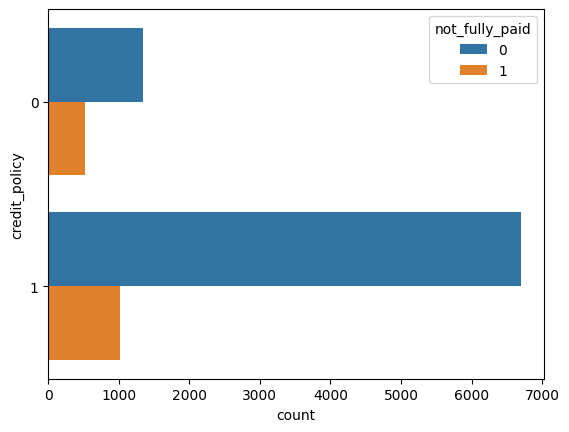

In [ ]:
# From borrowers who didn't meet the underwriting criteria, how many were defaulters?
sns.countplot(data=loans, y='credit_policy', hue='not_fully_paid');

In [ ]:
# Count of defaulters per credit_policy
loans.groupby(['credit_policy', 'not_fully_paid'])['not_fully_paid'].count()

credit_policy  not_fully_paid
0              0                 1349
               1                  519
1              0                 6696
               1                 1014
Name: not_fully_paid, dtype: int64

In [ ]:
# How many times was fico greater or equal to 670 in the dataset
good_fico_count = len([i for i in loans['fico'] if i >= 670])

# Percentage of borrowers with excellent scores
good_fico_pt = (good_fico_count/len(loans)) * 100
print('% of borrowers with good credit score:', round(good_fico_pt, 2))


% of borrowers with good credit score: 86.0


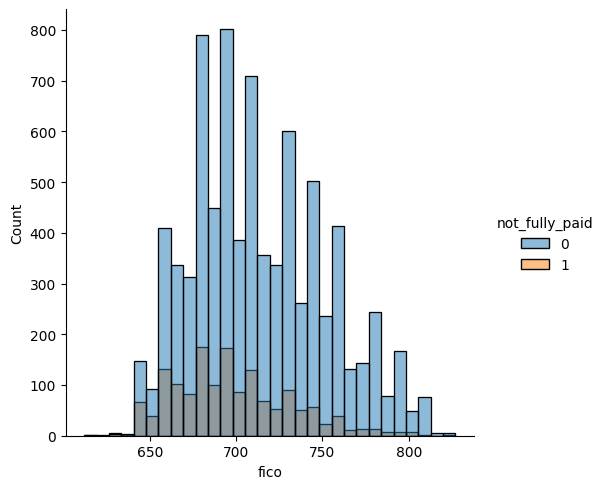

In [ ]:
# Fico distributions per loan payment outcome
sns.displot(data=loans, x='fico', bins = 30, hue = 'not_fully_paid', legend=True);

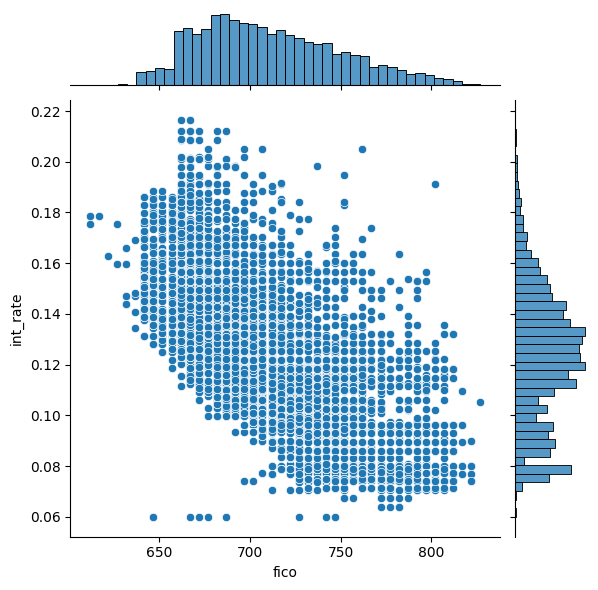

In [ ]:
# Visualize trend between fico and interest rate
sns.jointplot(x = 'fico', y = 'int_rate', data = loans);

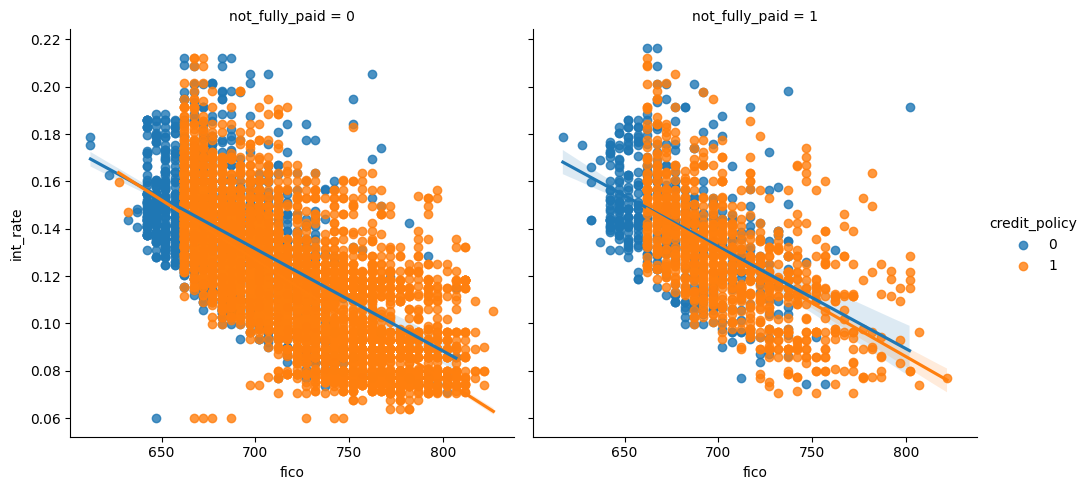

In [ ]:
# Relationship between fico and int rate based on if the loan was paid in full or not - grouped by credit policy
sns.lmplot(data= loans, x = 'fico', y = 'int_rate', col = 'not_fully_paid', hue = 'credit_policy');

### **Random Split with Cross-validation**

A random split with cross-validation involves randomly dividing the dataset into training and testing sets while utilizing cross-validation on the training set for model evaluation. This approach is commonly used when the temporal order of the data is not crucial, and there is no inherent time-dependent pattern or trend in the dataset.

Cross-validation is applied on the training set to evaluate the model's performance and assess its generalization ability. Cross-validation further divides the training set into multiple subsets (folds) and iteratively trains and validates the model on different combinations of these folds. This provides a more robust evaluation by reducing the impact of any particular data split and gives a better estimate of the model's performance on unseen data.

By combining random split and cross-validation, we achieve a balanced and comprehensive evaluation of the model's performance. This approach is suitable when there is sufficient data available, and we want to ensure an unbiased estimation of the model's accuracy and robustness to unseen data. It allows us to make informed decisions about the model's performance and its potential to generalize well to new, unseen data.

In [ ]:
target = 'not_fully_paid'

y = loans[target] # target vector
X = loans.drop(columns=target) # feature matrix

In [ ]:
# # Randomly split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

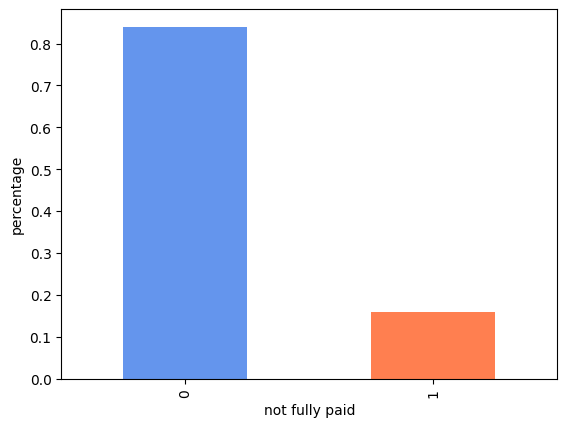

In [ ]:
# Let's take a look at the distribution of this column.

# Percentage
y_train.value_counts(normalize=True).plot(kind='bar', color=['cornflowerblue', 'coral'])
plt.xlabel('not fully paid')
plt.ylabel('percentage');

### **Target Distribution**

The graph shows our target has a binary class (0 and 1). Close to 84% of the instances are labeled as fully paid (class 0) and about 16% are labeled as not fully paid (class 1). This indicates an imbalanced class distribution.



### **Evaluation Metric**

Since the target class distribution is imbalanced, accuracy alone may be misleading. Therefore, it is recommended to consider additional evaluation metrics such as precision, recall, and F1-score, which provide a more comprehensive assessment of the model's performance for imbalanced datasets.

We are going to evaluate the models using F1-score, which is a combined metric that balances both precision and recall, making it a useful evaluation metric for imbalanced classification tasks like predicting loan defaults.

The F1 score takes into account both false positives (incorrectly approving loans to potential defaulters) and false negatives (missing out on potential good borrowers). By optimizing the F1 score, we aim to strike a balance between minimizing the risk of default (precision) and not rejecting creditworthy borrowers (recall).
